In [1]:
import pandas
from surnames_package import isonymic
from surnames_package import utils

In [2]:
DF_COLUMNS = ['division', 'n', 'ins', 'fst', 'fishers_alpha', 'A', 'B' ]

In [3]:
departamental_df = pandas.read_parquet("../_products/departmental/isonymy-2015.parquet")
departamental_df = utils.append_cell_description(df=departamental_df, departmentCodeColumn='division',)

In [4]:
departamental_df['v'] = isonymic.get_karlin_mcgregor_v_vect(
    serie_a=departamental_df['fishers_alpha'],
    serie_n=departamental_df['n']
)

In [9]:
departamental_df = (
    pandas.read_parquet(
        "../_products/departmental/get-merged-indicators-2015.parquet")
)

In [10]:
print(departamental_df.sort_values(by='n', ascending=False).head())
print("...")
print(departamental_df.sort_values(by='n', ascending=False).tail())

    department_id        n       ins       fst  fishers_alpha         a  \
165         14014  1045948  0.002170  0.000542     460.844038  0.015017   
470         82084   968743  0.001630  0.000407     613.627545  0.014645   
78          06427   907826  0.002292  0.000573     436.283561  0.023572   
66          06357   526361  0.001513  0.000378     660.787894  0.037309   
80          06441   496976  0.001348  0.000337     742.004914  0.031903   

            b         v         m  population_2015  
165  0.076668  0.000440  0.000501          1414201  
470  0.075747  0.000633  0.000751          1255394  
78   0.086616  0.000480  0.000329          2037428  
66   0.075727  0.001254  0.001582           640855  
80   0.071307  0.001491  0.001656           687378  
...
    department_id     n       ins       fst  fishers_alpha         a  \
305         42063  1079  0.019067  0.004767      52.445651  0.087118   
302         42042   748  0.010670  0.002668      93.719263  0.189840   
248        

In [11]:
departamental_df['n'].sum()

30324022

In [12]:
departamental_df['n'].sum()

30324022

In [13]:
import geopandas

In [14]:
departments_shape_file = "/home/lmorales/resources/departamentos.geojson"

In [15]:
shape = geopandas.read_file(departments_shape_file)

In [16]:
shape = shape[['departamento_id', 'provincia_id', 'geometry']]

<AxesSubplot:>

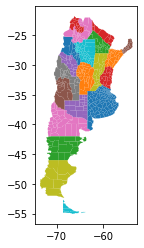

In [17]:
shape.plot(column='provincia_id')

In [18]:
shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   departamento_id  527 non-null    object  
 1   provincia_id     527 non-null    object  
 2   geometry         527 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 12.5+ KB


In [20]:
# [ ] - Combinar datos y capa
departmental_gdf = pandas.merge(
    shape,
    departamental_df,
    left_on='departamento_id',
    right_on='department_id'
)

In [21]:
import matplotlib.pyplot as plt

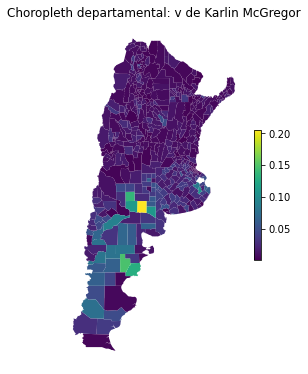

In [22]:
f, ax = plt.subplots(figsize=(4, 8))

departmental_gdf.plot(column='v', ax=ax, legend=True, legend_kwds={'shrink': 0.3})

ax.set_axis_off()
plt.title("Choropleth departamental: v de Karlin McGregor")
plt.show()

In [23]:
from surnames_package import spatial

/home/lmorales/miniconda3/envs/ds-env/lib/python3.9/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/home/lmorales/miniconda3/envs/ds-env/lib/python3.9/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [24]:
type(departmental_gdf)

geopandas.geodataframe.GeoDataFrame

In [25]:
from surnames_package import spatial_vis

tracts_palette {'Not significant': '#bababa', 'HH': '#d7191c', 'LH': '#abd9e9', 'LL': '#2c7bb6', 'HL': '#fdae61'}

edge_palette {'Not significant': 'white', 'HH': '#FFE6E6', 'LH': '#96b6f0', 'LL': '#050568', 'HL': '#F76E11'}


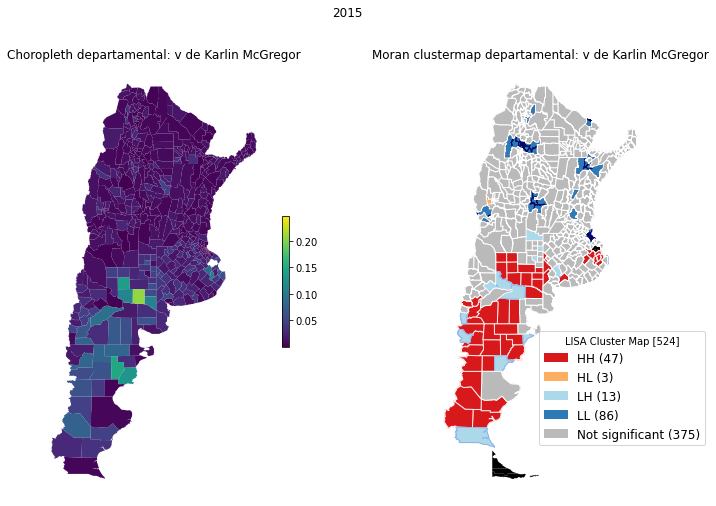

In [26]:
NEIGHBORHOOD_STRATEGY = 'knn'
NEIGHBORHOOD_PARAM = 4

# [ ] - Calcular Moran global y locales
weights, moran, lisa = spatial.get_spatials(
    departmental_gdf,
    attribute='v',
    strategy=NEIGHBORHOOD_STRATEGY,
    k_neighbours=NEIGHBORHOOD_PARAM
)

SIGNIFICANCE_LIMIT = .05
# [ ] - Contar las cantidades por cada cluster
quadfilter = (lisa.p_sim <= (SIGNIFICANCE_LIMIT)) * (lisa.q)
spot_labels = ['not-significant', 'hot-spot', 'donut', 'cold-spot', 'diamond']
labels = [spot_labels[i] for i in quadfilter]

# [ ] - Asignar una nueva variable, proyectar las dos columnas de interés y guardar.
departmental_gdf['label'] = labels

f, ax = plt.subplots(ncols=2, figsize=(12, 8))

vmax= 0.246286
vmin= 0.000597

departmental_gdf.plot(
    column='v',
    vmax=vmax,
    vmin=vmin,
    legend=True,
    legend_kwds={'shrink': 0.3},
    ax=ax[0])

ax[0].set_axis_off()
ax[0].set_title("Choropleth departamental: v de Karlin McGregor")

spatial_vis.create_clustermap_figure(
    departmental_gdf,
    shape,
    "Moran clustermap departamental: v de Karlin McGregor",
    ax=ax[1])

plt.suptitle("2015")
plt.show()

tracts_palette {'Not significant': '#bababa', 'HH': '#d7191c', 'LH': '#abd9e9', 'LL': '#2c7bb6', 'HL': '#fdae61'}

edge_palette {'Not significant': 'white', 'HH': '#FFE6E6', 'LH': '#96b6f0', 'LL': '#050568', 'HL': '#F76E11'}


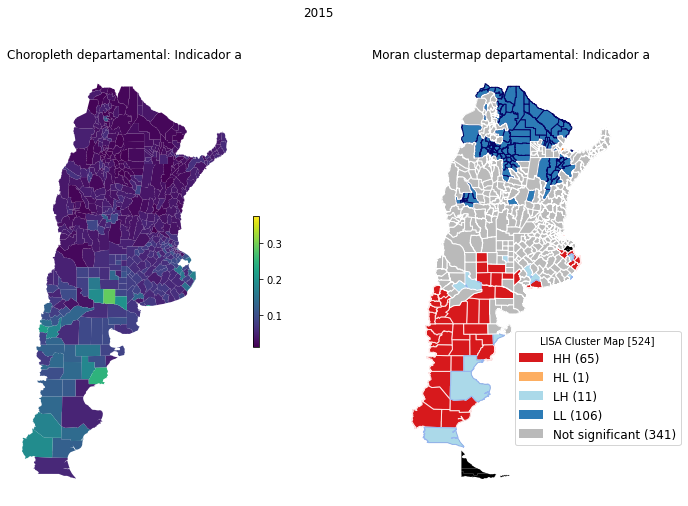

In [29]:
NEIGHBORHOOD_STRATEGY = 'knn'
NEIGHBORHOOD_PARAM = 4
ATTR = 'a'

# [ ] - Calcular Moran global y locales
weights, moran, lisa = spatial.get_spatials(
    departmental_gdf,
    attribute=ATTR,
    strategy=NEIGHBORHOOD_STRATEGY,
    k_neighbours=NEIGHBORHOOD_PARAM
)

SIGNIFICANCE_LIMIT = .05
# [ ] - Contar las cantidades por cada cluster
quadfilter = (lisa.p_sim <= (SIGNIFICANCE_LIMIT)) * (lisa.q)
spot_labels = ['not-significant', 'hot-spot', 'donut', 'cold-spot', 'diamond']
labels = [spot_labels[i] for i in quadfilter]

# [ ] - Asignar una nueva variable, proyectar las dos columnas de interés y guardar.
departmental_gdf['label'] = labels

f, ax = plt.subplots(ncols=2, figsize=(12, 8))

vmax= 0.37407
vmin= 0.01407
departmental_gdf.plot(
    column=ATTR,
    vmax=vmax,
    vmin=vmin,
    legend=True,
    legend_kwds={'shrink': 0.3},
    ax=ax[0])

ax[0].set_axis_off()
ax[0].set_title(f"Choropleth departamental: Indicador {ATTR}")

spatial_vis.create_clustermap_figure(
    departmental_gdf,
    shape,
    f"Moran clustermap departamental: Indicador {ATTR}",
    ax=ax[1])

plt.suptitle("2015")

plt.show()

tracts_palette {'Not significant': '#bababa', 'HH': '#d7191c', 'LH': '#abd9e9', 'LL': '#2c7bb6', 'HL': '#fdae61'}

edge_palette {'Not significant': 'white', 'HH': '#FFE6E6', 'LH': '#96b6f0', 'LL': '#050568', 'HL': '#F76E11'}


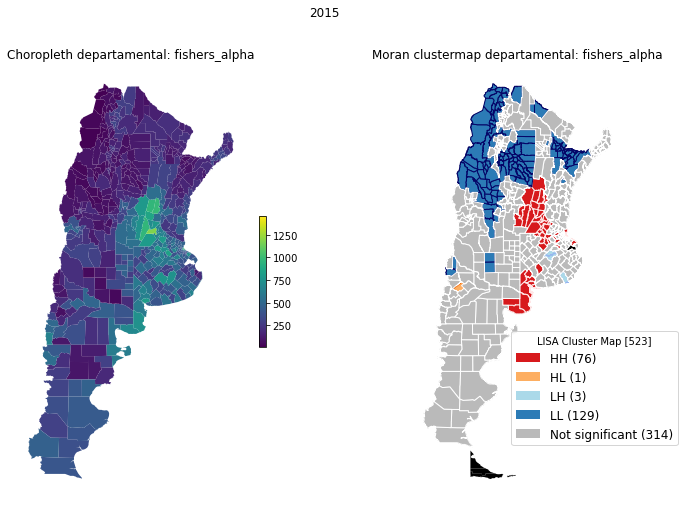

In [55]:
NEIGHBORHOOD_STRATEGY = 'knn'
NEIGHBORHOOD_PARAM = 4

# [ ] - Calcular Moran global y locales
weights, moran, lisa = spatial.get_spatials(
    departmental_gdf,
    attribute='fishers_alpha',
    strategy=NEIGHBORHOOD_STRATEGY,
    k_neighbours=NEIGHBORHOOD_PARAM
)

SIGNIFICANCE_LIMIT = .05
# [ ] - Contar las cantidades por cada cluster
quadfilter = (lisa.p_sim <= (SIGNIFICANCE_LIMIT)) * (lisa.q)
spot_labels = ['not-significant', 'hot-spot', 'donut', 'cold-spot', 'diamond']
labels = [spot_labels[i] for i in quadfilter]

# [ ] - Asignar una nueva variable, proyectar las dos columnas de interés y guardar.
departmental_gdf['label'] = labels

f, ax = plt.subplots(ncols=2, figsize=(12, 8))

vmax= 1456
vmin= 17

departmental_gdf.plot(
    column='fishers_alpha',
    vmax=vmax,
    vmin=vmin,
    legend=True,
    legend_kwds={'shrink': 0.3},
    ax=ax[0])

ax[0].set_axis_off()
ax[0].set_title("Choropleth departamental: fishers_alpha")

spatial_vis.create_clustermap_figure(
    departmental_gdf,
    shape,
    "Moran clustermap departamental: fishers_alpha",
    ax=ax[1])

plt.suptitle("2015")

plt.show()

In [48]:
NEIGHBORHOOD_STRATEGY = 'knn'
NEIGHBORHOOD_PARAM = 4

# [ ] - Calcular Moran global y locales
weights, moran, lisa = spatial.get_spatials(
    departmental_gdf,
    attribute='B',
    strategy=NEIGHBORHOOD_STRATEGY,
    k_neighbours=NEIGHBORHOOD_PARAM
)

SIGNIFICANCE_LIMIT = .05
# [ ] - Contar las cantidades por cada cluster
quadfilter = (lisa.p_sim <= (SIGNIFICANCE_LIMIT)) * (lisa.q)
spot_labels = ['not-significant', 'hot-spot', 'donut', 'cold-spot', 'diamond']
labels = [spot_labels[i] for i in quadfilter]

# [ ] - Asignar una nueva variable, proyectar las dos columnas de interés y guardar.
departmental_gdf['label'] = labels

tracts_palette {'Not significant': '#bababa', 'HH': '#d7191c', 'LH': '#abd9e9', 'LL': '#2c7bb6', 'HL': '#fdae61'}

edge_palette {'Not significant': 'white', 'HH': '#FFE6E6', 'LH': '#96b6f0', 'LL': '#050568', 'HL': '#F76E11'}


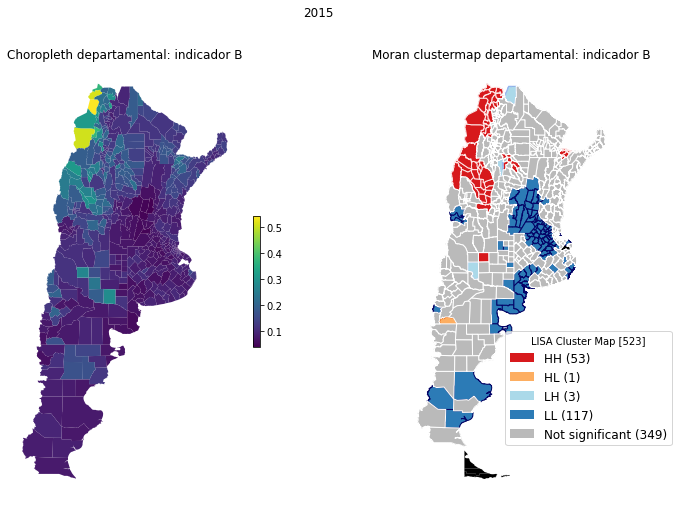

In [49]:
f, ax = plt.subplots(ncols=2, figsize=(12, 8))

departmental_gdf.plot(
    column='B',
    legend=True,
    legend_kwds={'shrink': 0.3},
    ax=ax[0])

ax[0].set_axis_off()
ax[0].set_title("Choropleth departamental: indicador B")

spatial_vis.create_clustermap_figure(
    departmental_gdf,
    shape,
    "Moran clustermap departamental: indicador B",
    ax=ax[1])

plt.suptitle("2015")

plt.show()

In [30]:
departmental_gdf['b'].max()

0.5425573260785076

In [51]:
departmental_gdf['B'].min()

0.0397806567945757